In [35]:
from tqdm import tqdm_notebook
import pandas as pd
import os
import pickle
import numpy as np
from nltk.tokenize import TweetTokenizer
from collections import defaultdict, Counter

import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set(color_codes=True)

from scipy.stats import kurtosis
from scipy.stats import skew

from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords

from collections import defaultdict, Counter


In [36]:
stoplist = list(set(stopwords.words('english'))) + \
            ['.',',','!','"','…','?','’',':','-','/',')','(','$','...','&','*',':)','%','”','“',"'",'+',';']

In [37]:
print(stoplist)

['shouldn', 'i', 'above', 're', 'when', 'to', 'you', "wouldn't", "mustn't", 'd', 'ain', 'isn', 'why', "you'll", 'him', 'were', "you'd", 'under', 'did', 'is', 'most', 'will', 'there', 'its', 'does', 'than', 'about', 'myself', 's', 'be', 'into', 'needn', 'has', 'now', 'didn', 'theirs', 'having', 'their', 'ma', 'was', 'few', 'only', 'where', 'are', 'a', 'itself', 'had', 'it', 'again', 'on', 'yourself', 'up', 'mightn', 'too', 'doesn', 'how', 'hers', 'this', 've', 'me', 'an', 'down', 'that', 'as', 'hasn', 'wouldn', "it's", 'himself', 'what', "mightn't", "that'll", "you've", "hadn't", "wasn't", 'been', 'they', 'our', 'yours', 'haven', 'won', "shouldn't", "don't", 'hadn', 'mustn', 'during', 'over', "should've", "needn't", 'weren', 'out', 'being', 'once', "couldn't", "aren't", 'until', 'herself', 'ours', 'here', 'all', 'm', 'just', 'for', 'he', 'between', "doesn't", 'y', 'not', 'if', 'these', 'some', 'nor', 'ourselves', 'and', 'same', 'am', 'both', 'have', "isn't", "she's", 'she', "haven't", '

In [15]:
# load sentiment data
df_sent = pd.DataFrame()
for i in tqdm_notebook(range(35)):
    
    with open('tweet_sent{}.pkl'.format(i), 'rb') as filehandle:  
    # read the data as binary data stream
        df_slice = pickle.load(filehandle)
        
    df_sent = pd.concat([df_sent, df_slice], ignore_index=True)

df_sent.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940809 entries, 0 to 940808
Data columns (total 15 columns):
id              940809 non-null object
date            940809 non-null datetime64[ns]
text            940809 non-null object
author          940809 non-null object
favorite        940809 non-null int64
url             940809 non-null object
lang            940809 non-null object
length          940809 non-null int64
cleantext       940809 non-null object
tokens          940809 non-null object
count           940809 non-null int64
vad_positive    940809 non-null float64
vad_neutral     940809 non-null float64
vad_negative    940809 non-null float64
vad_compound    940809 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(7)
memory usage: 107.7+ MB


In [16]:
def kurtosis_skewness(data):
    print( '      kurtosis=',"%.1f" % kurtosis(data), '   skewness=',"%.1f" % skew(data), '     sum=',np.sum(data))
    print()

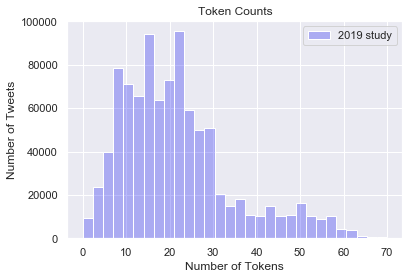

mined dataset
      kurtosis= 0.9    skewness= 1.1      sum= 20129319



In [22]:
# initialize list
data3 = df_sent['count'].tolist()

# set up a beautiful plot        
plt.hist(data3,30,(0, 70), color = (.1,.1,.95,.3), label = '2019 study')
plt.legend(loc='upper right')
plt.title('Token Counts')
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Tweets')
plt.show()
        
# after histogram, print out the distribution descriptors
print('mined dataset')
kurtosis_skewness(data3)


In [49]:
# clear the stopwords
bare_tok = []
bare_cnt = []
wtc = Counter()
for _,nrows in tqdm_notebook(df_sent.iterrows()):
    bare = []
    for Tok in nrows['tokens']:
        tok = Tok.lower()
        if not (tok in stoplist):
            bare.append(tok)
            wtc[tok] += 1
    bare_set = list(set(bare))
    bare_tok.append(bare_set)
    bare_cnt.append(len(bare_set))
len(bare_tok)

940809

In [50]:
len(wtc)

250204

In [51]:
print(wtc.most_common(100))

[('bitcoin', 81422), ('like', 62577), ('people', 49382), ('one', 45251), ('would', 41876), ('time', 41560), ('good', 39216), ("i'm", 38833), ('think', 37668), ('get', 34073), ('thanks', 31483), ('new', 28798), ('great', 28276), ('#bitcoin', 28022), ('see', 27281), ('want', 26636), ('know', 25981), ('need', 25834), ('make', 24419), ('much', 23715), ('also', 23644), ('btc', 23302), ('crypto', 23164), ('use', 22713), ('even', 22367), ('money', 22083), ('yes', 21704), ('well', 21676), ('way', 21383), ('us', 20852), ('still', 20677), ("that's", 20474), ('coins', 20104), ('could', 20073), ('really', 19825), ('right', 19519), ('2', 19477), ('sure', 19456), ('better', 19392), ('work', 19363), ('got', 19076), ('market', 18728), ('many', 18525), ('1', 18520), ('support', 18341), ('already', 18033), ('best', 17335), ('going', 17329), ('please', 17227), ('first', 16028), ('love', 15907), ('blockchain', 15807), ('value', 15752), ('thank', 15199), ('point', 14750), ('go', 14731), ('back', 14639), ('

In [ ]:
context = ['bitcoin', '#bitcoin', 'btc', 'bitcoins']

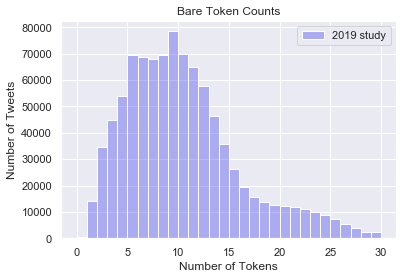

mined dataset
      kurtosis= 0.8    skewness= 1.0      sum= 9380021



In [53]:
# initialize list
data3 = bare_cnt

# set up a beautiful plot        
plt.hist(data3,30,(0, 30), color = (.1,.1,.95,.3), label = '2019 study')
plt.legend(loc='upper right')
plt.title('Bare Token Counts')
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Tweets')
plt.show()
        
# after histogram, print out the distribution descriptors
print('mined dataset')
kurtosis_skewness(data3)

In [54]:
# add bare features to dataframe
df_sent['keywords'] = bare_tok
df_sent['key_count'] = bare_cnt

df_sent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940809 entries, 0 to 940808
Data columns (total 17 columns):
id              940809 non-null object
date            940809 non-null datetime64[ns]
text            940809 non-null object
author          940809 non-null object
favorite        940809 non-null int64
url             940809 non-null object
lang            940809 non-null object
length          940809 non-null int64
cleantext       940809 non-null object
tokens          940809 non-null object
count           940809 non-null int64
vad_positive    940809 non-null float64
vad_neutral     940809 non-null float64
vad_negative    940809 non-null float64
vad_compound    940809 non-null float64
keywords        940809 non-null object
key_count       940809 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(4), object(8)
memory usage: 122.0+ MB


In [55]:
# add simple context filter

context = ['bitcoin', '#bitcoin', 'btc', 'bitcoins']
context_flags = []
for _,nrows in tqdm_notebook(df_sent.iterrows()):
    in_flag = 0
    for tok in nrows['keywords']:
        if (tok in context):
            in_flag = 1
    context_flags.append(in_flag)

len(context_flags)

940809

In [56]:
sum(context_flags)

126542

In [58]:
df_sent['context'] = context_flags
df_sent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940809 entries, 0 to 940808
Data columns (total 18 columns):
id              940809 non-null object
date            940809 non-null datetime64[ns]
text            940809 non-null object
author          940809 non-null object
favorite        940809 non-null int64
url             940809 non-null object
lang            940809 non-null object
length          940809 non-null int64
cleantext       940809 non-null object
tokens          940809 non-null object
count           940809 non-null int64
vad_positive    940809 non-null float64
vad_neutral     940809 non-null float64
vad_negative    940809 non-null float64
vad_compound    940809 non-null float64
keywords        940809 non-null object
key_count       940809 non-null int64
context         940809 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(5), object(8)
memory usage: 129.2+ MB


In [60]:
df_filt = df_sent[df_sent['context']==1].copy()
df_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126542 entries, 302 to 940805
Data columns (total 18 columns):
id              126542 non-null object
date            126542 non-null datetime64[ns]
text            126542 non-null object
author          126542 non-null object
favorite        126542 non-null int64
url             126542 non-null object
lang            126542 non-null object
length          126542 non-null int64
cleantext       126542 non-null object
tokens          126542 non-null object
count           126542 non-null int64
vad_positive    126542 non-null float64
vad_neutral     126542 non-null float64
vad_negative    126542 non-null float64
vad_compound    126542 non-null float64
keywords        126542 non-null object
key_count       126542 non-null int64
context         126542 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(5), object(8)
memory usage: 18.3+ MB


In [74]:
df_filt['date'][302].date()

datetime.date(2016, 11, 10)

<function matplotlib.pyplot.show(*args, **kw)>

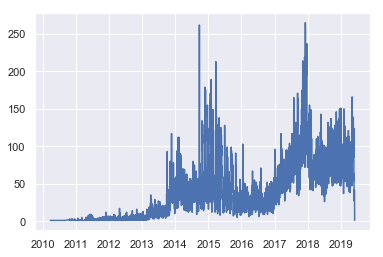

In [64]:
df_copytime = df_filt.copy()
df_copytime.set_index('date', inplace=True)
df = df_copytime.groupby(df_copytime.index.date).count()
plt.plot(df.index, df['id'])
plt.show

In [75]:
df_index = df_filt[['date','vad_compound']].copy()
df_index.head()

,date,vad_compound
302,2016-11-10 15:19:01,0.2263
1679,2017-03-28 20:29:57,0.4588
1788,2017-03-20 11:14:18,0.0772
2174,2017-03-10 10:08:31,0.2263
2257,2017-03-08 05:19:00,0.0516


In [83]:
df2 = df_index.sort_values('date')
df2.head()

,date,vad_compound
634098,2010-03-20 10:57:23,0.6249
634294,2010-04-12 09:36:12,-0.1759
634234,2010-04-21 08:42:11,0.4019
634369,2010-05-26 11:00:40,0.2732
634698,2010-07-12 19:26:45,0.3400


In [85]:
df3 = df2.set_index('date').groupby(pd.Grouper(freq='D')).mean()
df3.head()

,vad_compound
date,
2010-03-20,0.6249
2010-03-21,NaN
2010-03-22,NaN
2010-03-23,NaN
2010-03-24,NaN


In [86]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3365 entries, 2010-03-20 to 2019-06-05
Freq: D
Data columns (total 1 columns):
vad_compound    2911 non-null float64
dtypes: float64(1)
memory usage: 52.6 KB


<function matplotlib.pyplot.show(*args, **kw)>

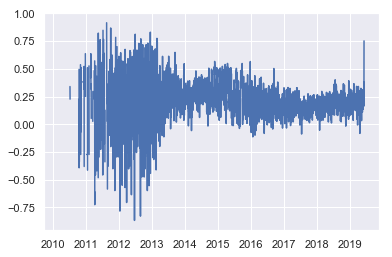

In [91]:
plt.plot(df3.index, df3['vad_compound'])
plt.show

In [90]:
df3['2014-01-01':].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1982 entries, 2014-01-01 to 2019-06-05
Freq: D
Data columns (total 1 columns):
vad_compound    1982 non-null float64
dtypes: float64(1)
memory usage: 31.0 KB


<function matplotlib.pyplot.show(*args, **kw)>

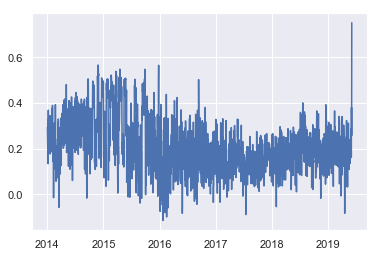

In [92]:
df4 = df3['2014-01-01':].copy()
plt.plot(df4.index, df4['vad_compound'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

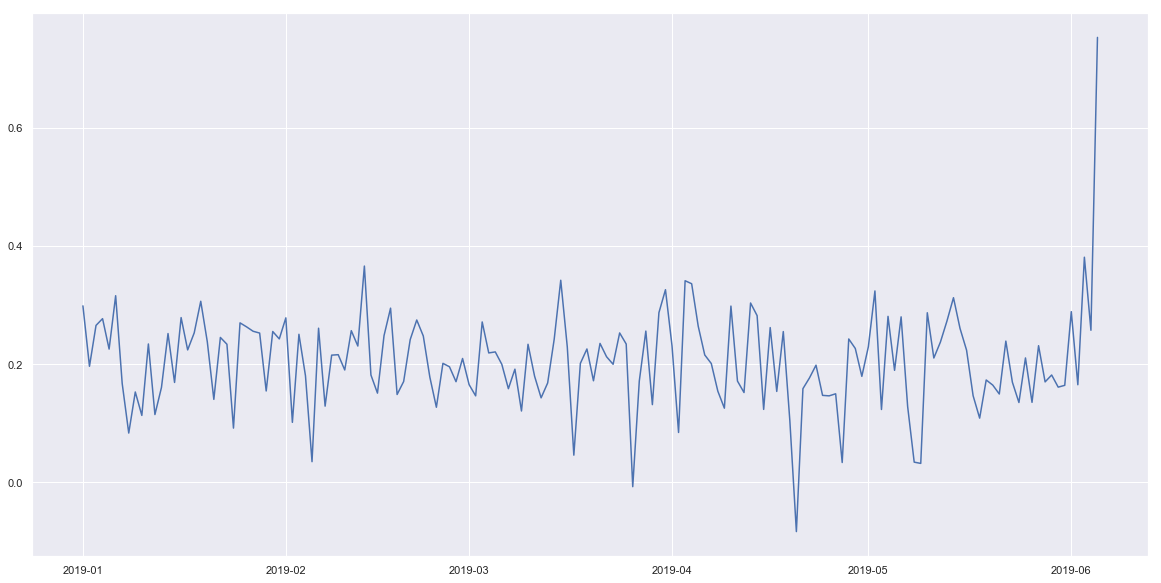

In [96]:
plt.figure(figsize=(20,10))
plt.plot(df4['2019-01-01':].index, df4['vad_compound']['2019-01-01':])
plt.show

In [97]:
# split giant dataframe into 35 pieces
df_cs = df_sent.copy()
df_split = np.array_split(df_cs, 35, axis=0)

# clean the dataframes, filter out the non-English entries
for i in tqdm_notebook(range(35)):
    
    # output to pickle
    with open('tweet_key{}.pkl'.format(i), 'wb') as filehandle:  
        # store the data
        pickle.dump(df_split[i], filehandle)

In [99]:
df4.to_csv('tsi001.csv', index=True)